In [2]:
from py5canvas import *

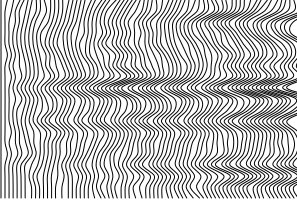

In [ ]:
import numpy

def draw_path(points):
    # Draws a curve connecting a list points [[x1, y1], [x2, y2], ...]
    begin_shape()
    for j in range(len(points)):
        curve_vertex(points[j][0], points[j][1])
    end_shape()

create_canvas(297, 210)

stroke_R = 100
stroke_G = 155
stroke_B = 80
stroke_A = 250

no_fill()
background(255)
# stroke(stroke_R, stroke_G, stroke_B, stroke_A)
stroke(0)
stroke_weight(1)

line_spacing = 4       # the distance that the vertical lines are apart
point_spacing = 11    # the distance between points on a line

num_points = int((height / point_spacing))

# initial pen position
x, y = 1, 0

line_pts = []
line_rec = [[]]

x_vary = [0,0,0,random_uniform(-0.01, 0.025),random_uniform(0.01, 0.067)]
x_vary_subseq = [0,0,0,random_uniform(-0.001, 0.25),random_uniform(0.001, 3)]

# points for the first line

for _ in range(num_points):
    line_rec[0].append([x, y])
    y += point_spacing
    x += random_choice(x_vary)

# draw the first line
draw_path(line_rec[0])

# draw the remaining lines

line_rec_i = 0
x_offset = 0

while x < width:
    # start at the top
    y = 0
   
    x_offset += line_spacing
    
    # create the positions for the new line
    line_pts = []
    for j in range(num_points):
        x = line_rec[line_rec_i][j][0] + x_offset # add current x_offset to prev line contours
        x += random_choice(x_vary_subseq) # add random variation to the new line
        # x values = 0 value contours of prev line + correct offset for new line + random variation
        line_pts.append([x, y]) 
        y += point_spacing

    stroke_R = random_uniform(90, 110)
    stroke_G = random_uniform(145, 165)
    stroke_B = random_uniform(70, 90)
    stroke_A = random_uniform(230, 250)

    #stroke(stroke_R, stroke_G, stroke_B, stroke_A)
    stroke(0)

    draw_path(line_pts)

    for j in range(num_points):
        line_pts[j][0] -= x_offset # remove current offset from current line

    line_rec.append(line_pts) # add 0 value line contours to record

    line_rec_i += 1

# save("line_trace.svg")

show()